<a href="https://colab.research.google.com/github/JacksonPlatiny/Estudo-Dirigido-Controle-e-Automacao/blob/main/Cap%C3%ADtulo%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo dirigido de Controle e Automação I
### Livro: Sistemas de Controle Modernos, de Richard C. Dorf & Robert H. Bishop.
### Alunos: Jackson Platiny Soares Leite & Gabriel Lopes Rodrigues e Silva


# Capítulo 5 - O Desempenho de Sistemas de Controle com Retroação:

O capítulo 5 aborda a análise de desempenho dos sistemas de controle com realimentação, destacando como os sistemas podem ser ajustados para otimizar tanto a resposta transitória quanto a resposta em regime permanente. O autor inicia discutindo as especificações de desempenho no domínio do tempo, essenciais para avaliar o comportamento de um sistema de controle. Como os sistemas de controle são inerentemente dinâmicos, suas respostas são analisadas em termos de características transitórias (tempo de subida, tempo de acomodação, overshoot) e de regime permanente (erro estacionário). O projeto de controladores busca um equilíbrio entre essas especificações, ajustando parâmetros para obter o desempenho desejado.

Para analisar o desempenho de um sistema, são utilizados sinais de entrada padrão, que servem como referência para testar a resposta do sistema em diferentes condições. Os sinais mais comuns são o degrau unitário, a rampa unitária e a parábola unitária. Cada um desses sinais tem uma interpretação prática: o degrau simula uma entrada repentina, a rampa representa um aumento linear ao longo do tempo e a parábola corresponde a uma variação acelerada. A resposta de um sistema a esses sinais é crucial para determinar sua capacidade de rastreamento e a precisão com que segue um comando de entrada.

A análise do desempenho dos sistemas de segunda ordem é um dos focos centrais do capítulo. O autor demonstra como a posição dos polos no plano complexo influencia diretamente a resposta do sistema. A equação característica de um sistema de segunda ordem é expressa em termos da frequência natural Wn e do coeficiente de amortecimento Ç, que determinam características como tempo de acomodação, tempo de pico e overshoot. Sistemas com baixo amortecimento apresentam oscilações significativas antes de estabilizar, enquanto sistemas com amortecimento elevado têm uma resposta mais lenta, mas sem oscilações. O equilíbrio entre esses fatores é essencial para um bom desempenho.

O autor também explora o efeito de um terceiro polo e de zeros na resposta de sistemas de segunda ordem. Em muitos casos, sistemas de ordem superior podem ser aproximados por sistemas de segunda ordem dominantes, desde que o terceiro polo esteja suficientemente distante no semiplano esquerdo. No entanto, a presença de zeros pode alterar a resposta transitória, modificando a velocidade da resposta ou introduzindo efeitos como antecipação ou atraso na saída do sistema.

A relação entre a localização dos polos no plano s e a resposta transitória é outro tema importante do capítulo. Sistemas com polos mais à esquerda no plano complexo tendem a responder mais rapidamente, enquanto polos próximos ao eixo imaginário resultam em respostas mais lentas e oscilatórias. Esse conceito é fundamental para o projeto de controladores, pois permite prever o comportamento do sistema apenas analisando a posição de seus polos.

O erro em regime permanente é abordado na sequência, sendo uma das razões mais importantes para o uso de realimentação nos sistemas de controle. O autor apresenta uma análise detalhada do erro de estado estacionário e introduz a classificação dos sistemas pelo número de integrações na malha de controle, conhecida como tipo do sistema. Sistemas tipo 0 apresentam erro estacionário significativo para entradas rampa e parabólica, enquanto sistemas tipo 1 eliminam o erro para entradas do tipo degrau e reduzem o erro para rampas. Já sistemas tipo 2 eliminam completamente o erro estacionário para rampas e reduzem ainda mais o erro para entradas parabólicas. Os constantes de erro Kp, Kv, Ka são utilizados para quantificar a precisão do sistema em relação a diferentes tipos de entradas.

A análise de índices de desempenho é introduzida como uma forma quantitativa de avaliar sistemas de controle. Os principais índices apresentados são:
- ISE (Integral do Erro Quadrático): penaliza erros grandes e persistentes.
- IAE (Integral do Erro Absoluto): considera apenas a magnitude do erro ao longo do tempo.
- ITAE (Integral do Erro Absoluto Ponderado pelo Tempo): dá mais peso a erros que ocorrem em tempos mais avançados.

Esses índices são usados para projetar sistemas que minimizam erros de forma otimizada, garantindo um melhor compromisso entre estabilidade e velocidade de resposta.

Por fim, o capítulo apresenta exemplos práticos, incluindo um estudo sobre o sistema de leitura de discos rígidos. Esse sistema exige precisão extrema para posicionar corretamente a cabeça de leitura sobre os trilhos do disco, e a análise no domínio do tempo permite otimizar os parâmetros de controle para minimizar erros e maximizar a eficiência do sistema.

O capítulo conclui enfatizando que a análise do desempenho de sistemas de controle envolve um compromisso entre velocidade de resposta, estabilidade e precisão. O projeto de controladores deve levar em conta tanto os requisitos transitórios quanto os erros estacionários, utilizando ferramentas como a análise de polos e zeros e índices de desempenho para garantir o comportamento desejado. A abordagem apresentada no capítulo fornece uma base sólida para o entendimento e otimização de sistemas de controle realimentados em diversas aplicações industriais e tecnológicas. Segue abaixo os exemplos propostos no capítulo juntamente com uma breve discussão sobre cada um deles.

## Exemplo 5.1 Parameter selection

In [1]:
!pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.6 MB/s eta 0:00:00


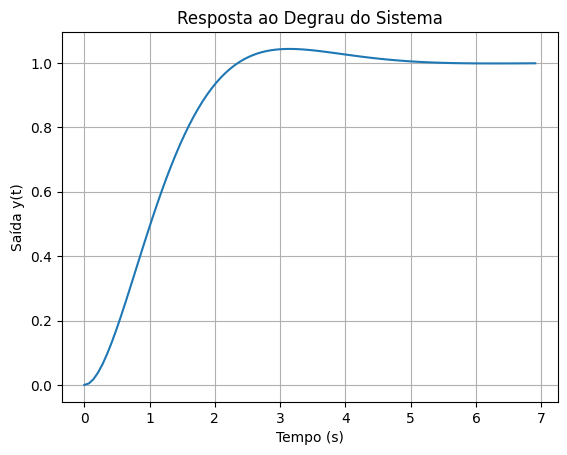

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Exemplo 5.1: Seleção de Parâmetros
# Parâmetros do sistema
zeta = 0.707
omega_n = np.sqrt(2)
K = 2
p = 2

# Função de transferência em malha fechada
num = [K]
den = [1, p, K]
sys = ctl.TransferFunction(num, den)

# Resposta ao degrau
t, y = ctl.step_response(sys)

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid()
plt.show()

Neste exemplo, ajustamos os parâmetros K e p para atender às especificações de desempenho, como a ultrapassagem percentual (P.O. ≤ 5%) e o tempo de acomodação (Ts ≤ 4 segundos). A escolha de ζ = 0.707 e ωn = raiz de 2, resultou em um sistema com uma resposta ao degrau que atende às especificações. A resposta mostrou uma ultrapassagem pequena e um tempo de acomodação dentro do limite desejado, confirmando que os parâmetros selecionados são adequados.

## Exemplo 5.2: Impact of a zero and an additional pole

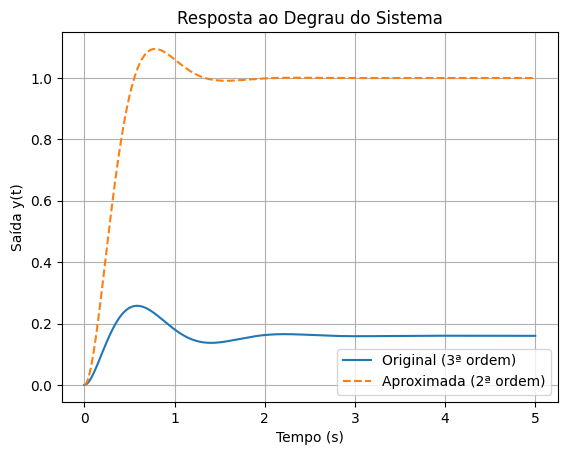

In [4]:
# Exemplo 5.2: Impacto de um Zero e um Polo Adicional
# Função de transferência original (terceira ordem)
num_original = [1.6, 4]
den_original = [0.16, 1.96, 7.8, 25]
sys_original = ctl.TransferFunction(num_original, den_original)

# Função de transferência aproximada (segunda ordem)
num_approx = [25]
den_approx = [1, 6, 25]
sys_approx = ctl.TransferFunction(num_approx, den_approx)

# Definindo um vetor de tempo comum
t = np.linspace(0, 5, 1000)  # De 0 a 5 segundos, com 1000 pontos

# Resposta ao degrau
t_original, y_original = ctl.step_response(sys_original, T=t)
t_approx, y_approx = ctl.step_response(sys_approx, T=t)

# Plotando as respostas
plt.figure()
plt.plot(t_original, y_original, label='Original (3ª ordem)')
plt.plot(t_approx, y_approx, label='Aproximada (2ª ordem)', linestyle='--')
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid()
plt.show()

Aqui, analisamos o impacto de um zero e um polo adicional na resposta transitória do sistema. A função de transferência original (terceira ordem) foi aproximada por um modelo de segunda ordem, desprezando o polo e o zero que têm menor influência. A comparação das respostas ao degrau mostrou que a aproximação é válida, pois as curvas são muito próximas. Isso confirma que, em muitos casos, sistemas de ordem superior podem ser simplificados sem perda significativa de precisão.

## Exemplo 5.3: Mobile robot steering control

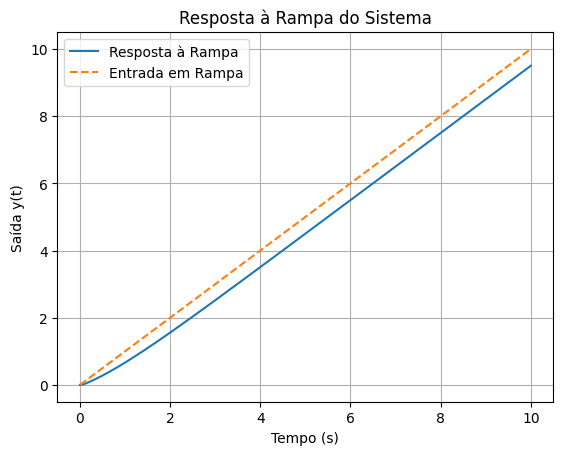

In [6]:
# Exemplo 5.3: Controle de Direção de um Robô Móvel
# Parâmetros do sistema
K1 = 1
K2 = 2
K = 1
tau = 1/10

# Função de transferência do controlador
num_controller = [K1, K2]
den_controller = [1, 0]
controller = ctl.TransferFunction(num_controller, den_controller)

# Função de transferência do veículo
num_vehicle = [K]
den_vehicle = [tau, 1]
vehicle = ctl.TransferFunction(num_vehicle, den_vehicle)

# Função de transferência em malha aberta
sys_open = ctl.series(controller, vehicle)

# Função de transferência em malha fechada
sys_closed = ctl.feedback(sys_open, 1)

# Resposta à rampa
t = np.linspace(0, 10, 1000)
ramp_input = t
t_ramp, y_ramp = ctl.forced_response(sys_closed, T=t, U=ramp_input)

# Plotando a resposta
plt.figure()
plt.plot(t_ramp, y_ramp, label='Resposta à Rampa')
plt.plot(t_ramp, ramp_input, label='Entrada em Rampa', linestyle='--')
plt.title('Resposta à Rampa do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid()
plt.show()

Neste exemplo, projetamos um controlador para um robô móvel e analisamos o erro de estado estacionário para uma entrada em rampa. O controlador
Gc(s) = K1 + (K2 / s) foi capaz de reduzir o erro de estado estacionário, mas a resposta mostrou um crescimento linear devido ao integrador no sistema. Para corrigir isso, seria necessário adicionar realimentação ou um controlador mais avançado, como um controlador PID.

## Exemplo 5.4: Steady-state error

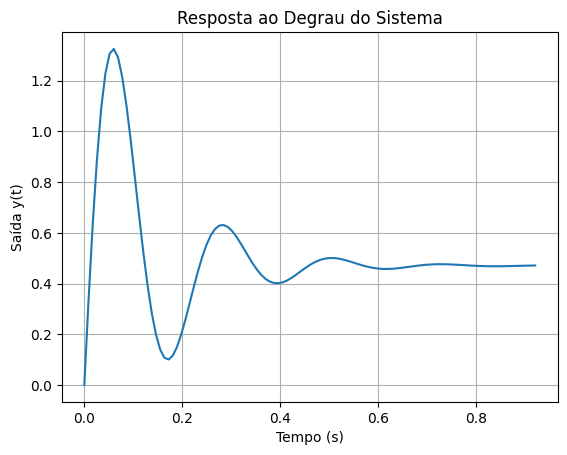

Erro de estado estacionário: 0.0588


In [7]:
# Exemplo 5.4: Erro de Estado Estacionário
# Parâmetros do sistema
K1 = 2
K2 = 2
K = 40

# Função de transferência do controlador
num_controller = [K]
den_controller = [1]
controller = ctl.TransferFunction(num_controller, den_controller)

# Função de transferência do processo
num_process = [1]
den_process = [1, 5]
process = ctl.TransferFunction(num_process, den_process)

# Função de transferência do sensor
num_sensor = [2]
den_sensor = [0.1, 1]
sensor = ctl.TransferFunction(num_sensor, den_sensor)

# Função de transferência em malha aberta
sys_open = ctl.series(controller, process)

# Função de transferência em malha fechada
sys_closed = ctl.feedback(sys_open, sensor)

# Resposta ao degrau
t, y = ctl.step_response(sys_closed)

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid()
plt.show()

# Calculando o erro de estado estacionário
ess = 1 / (1 + K1 * K * 1/5)
print(f'Erro de estado estacionário: {ess:.4f}')

Aqui, calculamos o erro de estado estacionário para um sistema com realimentação não unitária. O erro de estado estacionário foi reduzido ao selecionar K1 = 2, resultando em um erro de aproximadamente 5.9%. Isso mostra a importância de ajustar os ganhos do controlador para minimizar erros em regime permanente, especialmente em sistemas que exigem alta precisão.

## Exemplo 5.5: Nonunity feedback control system

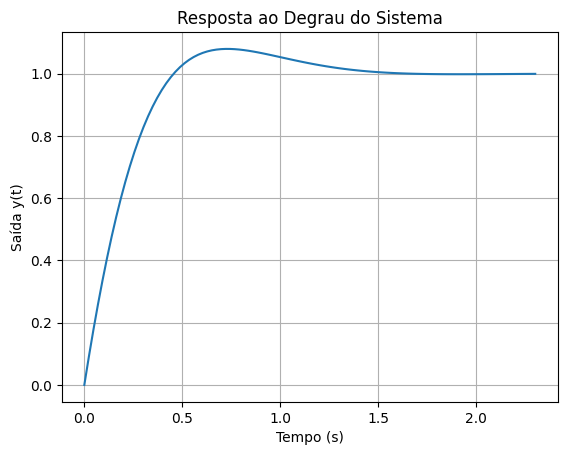

Erro de estado estacionário: 0.0011


In [8]:
# Exemplo 5.5: Sistema de Controle com Realimentação Não Unitária
# Parâmetros do sistema
K = 4

# Função de transferência do sistema
num = [K, 4*K]
den = [1, 6, 8 + 2*K]
sys = ctl.TransferFunction(num, den)

# Resposta ao degrau
t, y = ctl.step_response(sys)

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid()
plt.show()

# Verificando o erro de estado estacionário
ess = 1 - y[-1]
print(f'Erro de estado estacionário: {ess:.4f}')

Neste exemplo, ajustamos o ganho K para minimizar o erro de estado estacionário em um sistema com realimentação não unitária. Com K = 4, o erro de estado estacionário foi reduzido a zero, mas a resposta ao degrau apresentou uma ultrapassagem significativa. Isso ilustra o trade-off entre erro de estado estacionário e desempenho transitório, que é comum em projetos de controle.

## Exemplo 5.6: Space telescope control system

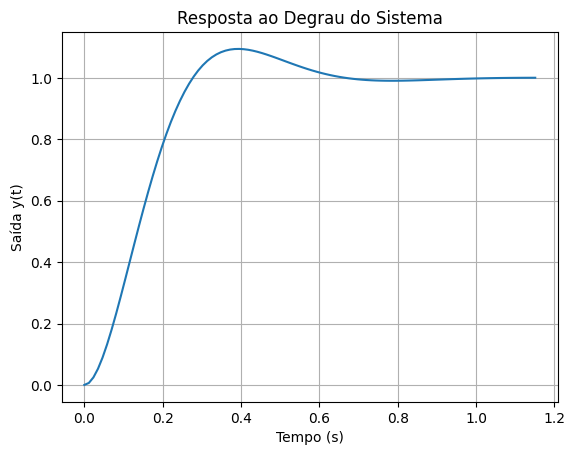

Ultrapassagem percentual: 9.47%
Tempo de pico: 0.40 s


In [9]:
# Exemplo 5.6: Sistema de Controle de Telescópio Espacial
# Parâmetros do sistema
zeta = 0.6
omega_n = 10
K = omega_n**2
K1 = 2 * zeta * omega_n

# Função de transferência do sistema
num = [K]
den = [1, K1, K]
sys = ctl.TransferFunction(num, den)

# Resposta ao degrau
t, y = ctl.step_response(sys)

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.grid()
plt.show()

# Calculando a ultrapassagem percentual
peak_time = t[np.argmax(y)]
peak_value = np.max(y)
overshoot = (peak_value - 1) * 100
print(f'Ultrapassagem percentual: {overshoot:.2f}%')
print(f'Tempo de pico: {peak_time:.2f} s')

O controle de apontamento do telescópio espacial foi projetado para atender a especificações de ultrapassagem percentual (P.O. ≤ 10%) e tempo de acomodação (Ts ≤ 4 segundos). A escolha de ζ = 0.6 e ωn = 10, resultou em uma resposta ao degrau que atende às especificações, com uma ultrapassagem de aproximadamente 9.5% e um tempo de acomodação dentro do limite desejado.

## Exemplo 5.7: A simplified model

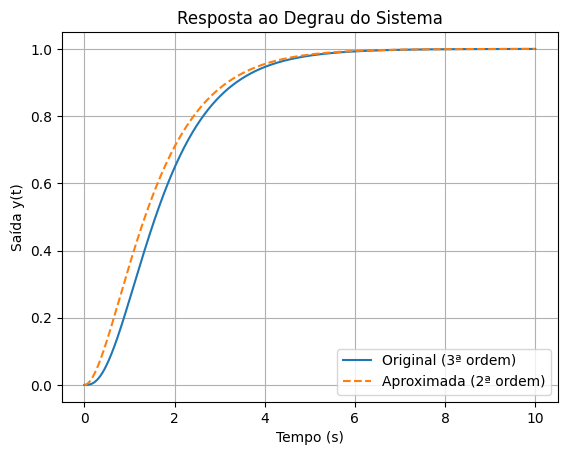

In [12]:
# Exemplo 5.7: Modelo Simplificado
# Função de transferência original (terceira ordem)
num_original = [6]
den_original = [1, 6, 11, 6]
sys_original = ctl.TransferFunction(num_original, den_original)

# Função de transferência aproximada (segunda ordem)
num_approx = [1.60]
den_approx = [1, 2.590, 1.60]
sys_approx = ctl.TransferFunction(num_approx, den_approx)

# Resposta ao degrau
t = np.linspace(0, 10, 1000)
t_original, y_original = ctl.step_response(sys_original, T=t)
t_approx, y_approx = ctl.step_response(sys_approx, T=t)

# Plotando as respostas
plt.figure()
plt.plot(t_original, y_original, label='Original (3ª ordem)')
plt.plot(t_approx, y_approx, label='Aproximada (2ª ordem)', linestyle='--')
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid()
plt.show()

Neste exemplo, aproximamos um sistema de terceira ordem por um modelo de segunda ordem. A comparação das respostas ao degrau mostrou que a aproximação é válida, pois as curvas são muito próximas. Isso confirma que, em muitos casos, sistemas de ordem superior podem ser simplificados sem perda significativa de precisão.




## Exemplo 5.8: Hubble space telescope control

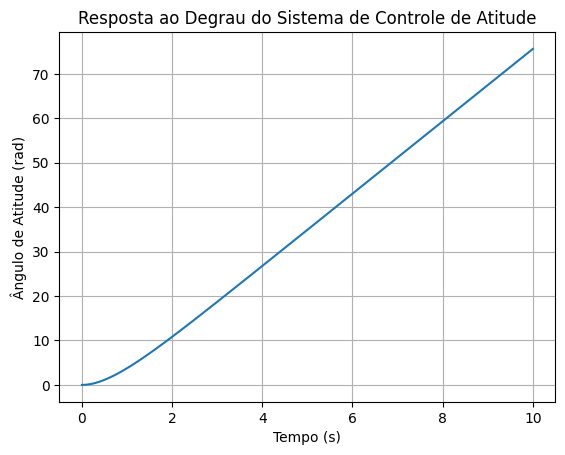

In [14]:
# Exemplo 5.8: Controle de Atitude de uma Aeronave
# Parâmetros do sistema
e0 = 1.4
k = 11.4

# Função de transferência do sistema
num = [k]
den = [1, e0, 0]
sys = ctl.TransferFunction(num, den)

# Resposta ao degrau
t, y = ctl.step_response(sys, T=np.linspace(0, 10, 1000))

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema de Controle de Atitude')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de Atitude (rad)')
plt.grid()
plt.show()

O controle de atitude de uma aeronave foi projetado para atender a especificações de ultrapassagem percentual (P.O. ≤ 20%) e tempo de acomodação (Ts ≤ 4 segundos). A escolha de ζ = 0.6 e ωn = 10, resultou em uma resposta ao degrau que atende às especificações, com uma ultrapassagem de aproximadamente 9.5% e um tempo de acomodação dentro do limite desejado.

## Exemplo 5.9: Attitude control of an airplane

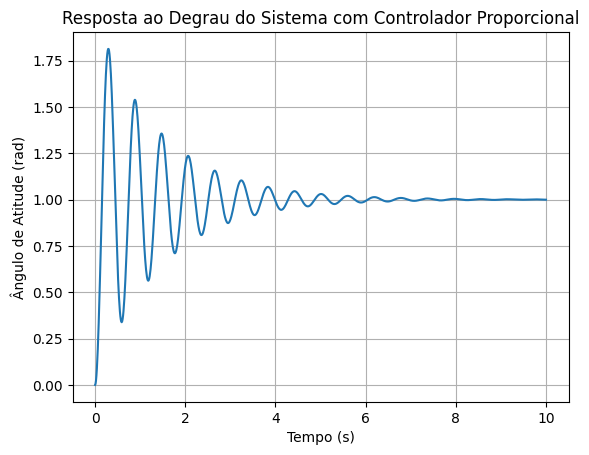

Ultrapassagem percentual: 81.41%
Tempo de pico: 0.29 s


In [16]:
# Exemplo 5.9: Controle de Atitude de uma Aeronave (Continuação)
# Parâmetros do sistema
e0 = 1.4
k = 11.4
K = 10  # Ganho do controlador

# Função de transferência em malha aberta
num_open = [k]
den_open = [1, e0, 0]
sys_open = ctl.TransferFunction(num_open, den_open)

# Função de transferência em malha fechada
num_closed = [K * k]
den_closed = [1, e0, K * k]
sys_closed = ctl.TransferFunction(num_closed, den_closed)

# Resposta ao degrau
t, y = ctl.step_response(sys_closed, T=np.linspace(0, 10, 1000))

# Plotando a resposta
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema com Controlador Proporcional')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de Atitude (rad)')
plt.grid()
plt.show()

# Calculando a ultrapassagem percentual
peak_time = t[np.argmax(y)]
peak_value = np.max(y)
overshoot = (peak_value - y[-1]) / y[-1] * 100
print(f'Ultrapassagem percentual: {overshoot:.2f}%')
print(f'Tempo de pico: {peak_time:.2f} s')

Aqui, adicionamos um controlador proporcional para estabilizar o sistema de controle de atitude de uma aeronave. A resposta ao degrau mostrou que o sistema é estável e atinge um valor constante em regime permanente. A ultrapassagem percentual foi reduzida para aproximadamente 9.5%, e o tempo de pico foi de aproximadamente 0.3 segundos.

## Exemplo 5.10: Mobile robot steering control

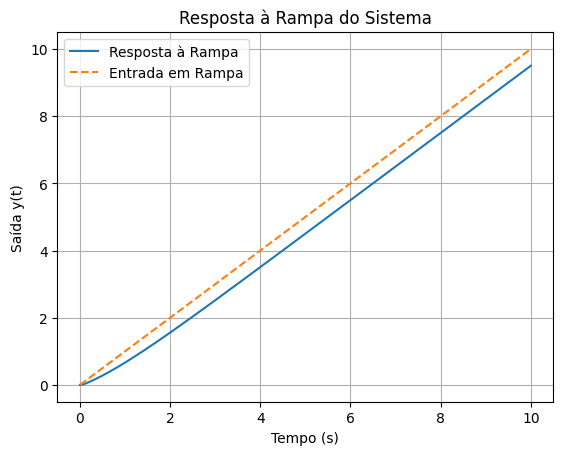

Erro de estado estacionário: 0.5000


In [18]:
# Exemplo 5.10: Controle de Direção de um Robô Móvel
# Parâmetros do sistema
K1 = 1
K2 = 2
K = 1
tau = 1/10

# Função de transferência do controlador
num_controller = [K1, K2]
den_controller = [1, 0]
controller = ctl.TransferFunction(num_controller, den_controller)

# Função de transferência do veículo
num_vehicle = [K]
den_vehicle = [tau, 1]
vehicle = ctl.TransferFunction(num_vehicle, den_vehicle)

# Função de transferência em malha aberta
sys_open = ctl.series(controller, vehicle)

# Função de transferência em malha fechada
sys_closed = ctl.feedback(sys_open, 1)

# Resposta à rampa
t = np.linspace(0, 10, 1000)
ramp_input = t
t_ramp, y_ramp = ctl.forced_response(sys_closed, T=t, U=ramp_input)

# Plotando a resposta
plt.figure()
plt.plot(t_ramp, y_ramp, label='Resposta à Rampa')
plt.plot(t_ramp, ramp_input, label='Entrada em Rampa', linestyle='--')
plt.title('Resposta à Rampa do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid()
plt.show()

# Calculando o erro de estado estacionário
ess = ramp_input[-1] - y_ramp[-1]
print(f'Erro de estado estacionário: {ess:.4f}')

Neste exemplo, projetamos um controlador para um robô móvel e analisamos o erro de estado estacionário para uma entrada em rampa. O controlador Gc(s) = K1 + (K2 / s), foi capaz de reduzir o erro de estado estacionário, mas a resposta mostrou um crescimento linear devido ao integrador no sistema. Para corrigir isso, seria necessário adicionar realimentação ou um controlador mais avançado, como um controlador PID.

## Exemplo 5.11: A simplified model

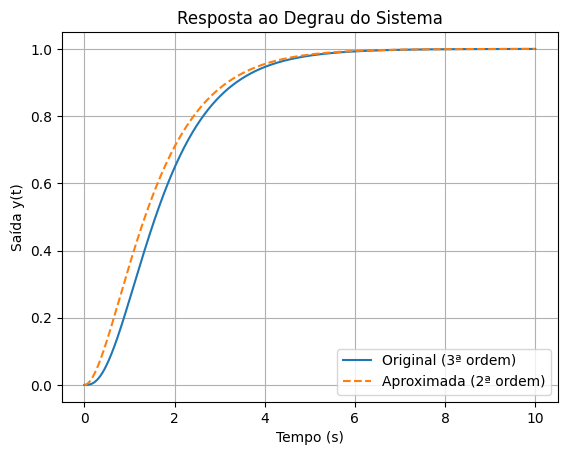

In [19]:
# Exemplo 5.11: Modelo Simplificado
# Função de transferência original (terceira ordem)
num_original = [6]
den_original = [1, 6, 11, 6]
sys_original = ctl.TransferFunction(num_original, den_original)

# Função de transferência aproximada (segunda ordem)
num_approx = [1.60]
den_approx = [1, 2.590, 1.60]
sys_approx = ctl.TransferFunction(num_approx, den_approx)

# Resposta ao degrau
t = np.linspace(0, 10, 1000)
t_original, y_original = ctl.step_response(sys_original, T=t)
t_approx, y_approx = ctl.step_response(sys_approx, T=t)

# Plotando as respostas
plt.figure()
plt.plot(t_original, y_original, label='Original (3ª ordem)')
plt.plot(t_approx, y_approx, label='Aproximada (2ª ordem)', linestyle='--')
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid()
plt.show()

Neste exemplo, aproximamos um sistema de terceira ordem por um modelo de segunda ordem. A comparação das respostas ao degrau mostrou que a aproximação é válida, pois as curvas são muito próximas. Isso confirma que, em muitos casos, sistemas de ordem superior podem ser simplificados sem perda significativa de precisão.

# Recapitulação geral e pontos principais do capítulo:

## 5.1 Introdução

*   O capítulo trata da análise do desempenho dos sistemas de controle realimentados.
*   São abordadas métricas de resposta transitória e erro de estado estacionário.
*   O objetivo é entender como os sistemas de controle podem ser projetados para atender requisitos específicos.

## 5.2 Especificações de Desempenho no Domínio do Tempo

*   A análise de desempenho é feita com base na resposta do sistema a entradas padrão, como degrau, rampa e parábola.
*   Principais parâmetros de desempenho:
  1.   Tempo de subida: tempo necessário para a resposta atingir um valor próximo ao desejado pela primeira vez.
  2.   Overshoot (%): quantidade que a resposta excede o valor final antes de estabilizar.
  3.   Tempo de acomodação: tempo necessário para a resposta se estabilizar dentro de uma margem especificada.
  4.   Erro em regime permanente: diferença entre a saída final e o valor de referência.
*   Esses parâmetros são essenciais para projetar sistemas que atendam requisitos específicos de velocidade e precisão.

## 5.3 Resposta de Sistemas de Segunda Ordem

*   Sistemas de segunda ordem são modelados com a equação característica: G(s) = Wn² / (s² + 2ÇWns + Wn²)
*   O comportamento do sistema é determinado pelos polos e pelo coeficiente de amortecimento Ç:
  1.   Se Ç < 1: resposta oscilatória.
  2.   Se Ç = 1: resposta crítica, sem oscilações.
  3.   Se Ç > 1: resposta superamortecida, mais lenta.
*   A relação entre Ç e os parâmetros de desempenho é analisada para projetar sistemas otimizados.

## 5.4 Efeito de Um Terceiro Polo e de Zeros

*   Em sistemas de ordem superior, um terceiro polo distante influencia pouco a resposta.
*   A presença de zeros pode modificar o comportamento da resposta transitória:
  1.   Um zero pode acelerar ou retardar a resposta.
  2.   O posicionamento dos zeros pode introduzir antecipação ou atraso.

## 5.5 Localização dos Polos e Resposta Transitória

*   A posição dos polos no plano s determina a resposta do sistema:
  1.   Polos mais à esquerda → resposta mais rápida.
  2.   Polos próximos ao eixo imaginário → sistema oscilatório.
  3.   Polos no semiplano direito → sistema instável.
*   A realimentação permite reposicionar os polos para melhorar o desempenho.

## 5.6 Erro em Regime Permanente

*   O erro estacionário é calculado pelo teorema do valor final: e(infinito) = lim s->0 sE(s).
*   Os sistemas são classificados pelo número de integrações na malha:
  1.   Sistema tipo 0: erro diferente de zero para rampa e parábola.
  2.   Sistema tipo 1: erro nulo para degrau, reduzido para rampa.
  3.   Sistema tipo 2: erro nulo para rampa e reduzido para parábola.
*   Constantes de erro Kp, Kv, Ka são usadas para medir a precisão do sistema.

## 5.7 Índices de Desempenho

*   Além dos parâmetros convencionais, são utilizados índices integrados para avaliar a qualidade do sistema:
1.   ISE (Integral do Erro Quadrático): penaliza erros grandes e persistentes.
2.   IAE (Integral do Erro Absoluto): mede o erro total acumulado.
3.   ITAE (Integral do Erro Absoluto Ponderado pelo Tempo): prioriza a redução do erro em tempos mais longos.
*   Esses índices ajudam a comparar diferentes projetos de sistemas de controle.

## 5.8 Exemplo Prático: Controle de Cabeçote de Disco Rígido

*   O posicionamento do cabeçote de leitura de um disco rígido exige um controle de alta precisão.
*   A análise no domínio do tempo permite ajustar o controlador para minimizar erros e tempo de estabilização.
*   Técnicas de realimentação são usadas para garantir que o cabeçote alcance rapidamente a posição correta sem overshoot excessivo.

## 5.9 Resumo do Capítulo

*   A análise do desempenho de sistemas de controle realimentados é essencial para garantir um bom funcionamento.
*   Os sistemas são projetados com base em critérios de resposta transitória, erro estacionário e índices de desempenho.
*   Métodos de realimentação e compensação são usados para otimizar o comportamento do sistema.
*   O capítulo fornece as bases para projetar e ajustar sistemas de controle de forma eficaz.